In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

подготовка изображения

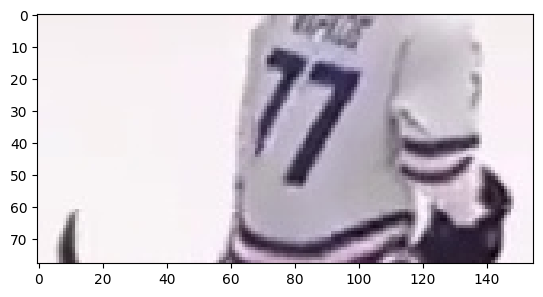

In [2]:
img_path = "../output_videos/crop_image.jpg"
image = cv2.imread(img_path)

# преобразуем в нужное цвет. простр-во (из бгр в ргб)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# возьмем только вверх изображения
hight_img = len(image)
top_half_img = image[int(hight_img*0.19):int(hight_img*0.5), :]
plt.imshow(top_half_img)
plt.show()




разобъем изображение на 2 цветовых кластера

C:\Users\Trampoline\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Trampoline\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

0.1324234904880066
6258
1601
12090
1601


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(78, 155), dtype=int32)

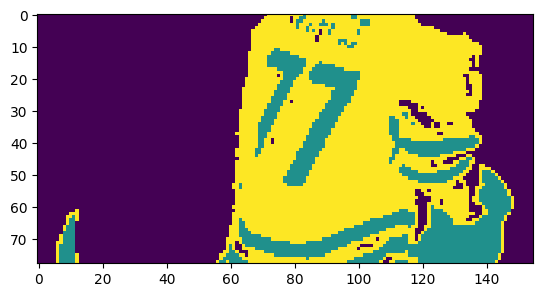

In [3]:
# преобразуем изображение в массив точек
img2d = top_half_img.reshape(-1, 3)

# обучим модель кластеризации
kmeans_model = KMeans(n_clusters=3, init="k-means++", n_init=1,  random_state=42)
kmeans_model.fit(img2d)

#получим метки и преобразоем обратно в изображение
labels = kmeans_model.labels_
list_labels = list(labels)
count_rarely_label = list_labels.count(min(list_labels, key=list_labels.count))
count_often_label = list_labels.count(max(list_labels, key=list_labels.count))

k_labels = count_rarely_label/len(labels)
print(k_labels)
print(list_labels.count(0))
print(list_labels.count(1))
print(len(labels))
print(count_rarely_label)

clastered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])
plt.imshow(clastered_img)
clastered_img




In [4]:
#посмотрим какой кластер является игроком
#очевидно, что по углам изображения будет скорее всего фон
corner_pixels = [clastered_img[0, 0], clastered_img[0, -1], clastered_img[-1, 0], clastered_img[-1, -1]]
backgraund_label = max(corner_pixels, key=corner_pixels.count)
#backgraund_label = max(list_labels, )
player_label = 1 - backgraund_label

# получим цвет игрока
player_color = kmeans_model.cluster_centers_[player_label]
backgraund_color = kmeans_model.cluster_centers_[backgraund_label]
print("игрок", player_label, player_color)
print("фон", backgraund_label, backgraund_color)

print(type(kmeans_model.cluster_centers_[player_label]))






игрок 1 [71.82573392 60.13928795 79.90943161]
фон 0 [246.9261745  240.30169383 243.9824225 ]
<class 'numpy.ndarray'>


In [5]:
# 2 способ определения фона
# найдем фон, как самый яркий кластер 
centers = kmeans_model.cluster_centers_.tolist()
backgraund_color = max(centers, key = lambda x: sum(x))
backgraund_label = centers.index(backgraund_color)

# найдем веса кластеров игрока (нужно для среднего взвешенного) 
labels = kmeans_model.labels_.tolist()
label_pl1, label_pl2 = set(labels) - set([backgraund_label])
w1, w2 = labels.count(label_pl1), labels.count(label_pl2)


# смешиваем краски)
pl_col = np.array([(i*w1 + j*w2)/(w1 + w2) for i, j in zip(centers[label_pl1], centers[label_pl2])])

print(pl_col)


[152.73388203 142.86899863 159.01971879]


In [6]:
centers = np.array(centers)

kmeans_model.predict(centers[1].reshape(1, -1))



array([1], dtype=int32)

In [15]:
d = {1:{'bbox':[1323]}}
d1 = {}
d.get(1, {}).get('bbox', [])

[1323]

In [4]:
Cated_frame = [[] for i in range(6)]
print(Cated_frame)

[[], [], [], [], [], []]
